In [1]:
import sekve
from matplotlib import pyplot as plt
from utils.read_data import read_iv
from utils.plot_iv import plot_idvg, plot_idvd
from utils.plot_sty import rcParams_update

plt.rcdefaults()
rcParams_update()

In [2]:
# DUT module
# '2602' -> nfet
# '2605' -> pfet
# '5290' -> nshort
mod = '2602'

# DUT index
# '2602' -> from 1 to 4
# '2605' -> from 1 to 4
# '5290' -> from 1 to 10
idx = 2


# Raw IV data

DUTinfo(die=1, mod='2602', idx=2, flavor='nfet', W=3e-06, L=1.5e-07, meas_mode='idvg', VG=None, VD=0.05, VB=0.0, T=300.0)
DUTinfo(die=1, mod='2602', idx=2, flavor='nfet', W=3e-06, L=1.5e-07, meas_mode='idvg', VG=None, VD=1.8, VB=0.0, T=300.0)
DUTinfo(die=1, mod='2602', idx=2, flavor='nfet', W=1.5e-07, L=3e-06, meas_mode='idvd', VG=1.8, VD=None, VB=0.0, T=300.0)
DUTinfo(die=1, mod='2602', idx=2, flavor='nfet', W=3e-06, L=1.5e-07, meas_mode='idvd', VG=0.3, VD=None, VB=0.0, T=300.0)
DUTinfo(die=1, mod='2602', idx=2, flavor='nfet', W=3e-06, L=1.5e-07, meas_mode='idvd', VG=0.6, VD=None, VB=0.0, T=300.0)
DUTinfo(die=1, mod='2602', idx=2, flavor='nfet', W=3e-06, L=1.5e-07, meas_mode='idvd', VG=1.2, VD=None, VB=0.0, T=300.0)


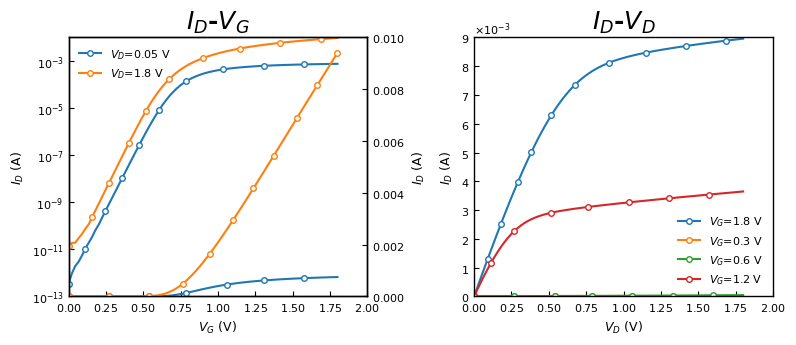

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3.5))

# ID-VG

ax = axes[0]
axt = ax.twinx()
data = read_iv(mod, idx, meas_mode='idvg')

for dut_info, df in data:
    print(dut_info)
    plot_idvg(df, (ax, axt), label=f'$V_D$={dut_info.VD} V')
ax.set_title("$I_D$-$V_G$", fontsize=18)
# ID-VD

ax = axes[1]
data = read_iv(mod, idx, meas_mode='idvd')

for dut_info, df in data:
    print(dut_info)
    plot_idvd(df, ax, label=f'$V_G$={dut_info.VG} V')
ax.set_title("$I_D$-$V_D$", fontsize=18)

fig.tight_layout()

# sEKV modeling

In [4]:
%%capture
dut_info, data = read_iv(mod, idx, meas_mode='idvg', vd=1.8)[0]

res = sekve.Extractor(i=data.ID.values, vg=data.VG.values, vd=1.8)
res.run_extraction()

DUTinfo(die=1, mod='2602', idx=2, flavor='nfet', W=3e-06, L=1.5e-07, meas_mode='idvg', VG=None, VD=1.8, VB=0.0, T=300.0)


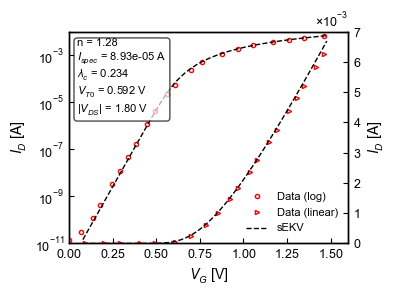

In [5]:
print(dut_info)
res.final_fig